<a id="introduction"></a>
## Introduction to RAPIDS
#### Adapted from [getting started notebooks](https://github.com/rapidsai-community/notebooks-contrib/tree/branch-0.14/getting_started_notebooks)
-------

While the world’s data doubles each year, CPU computing has hit a brick wall with the end of Moore’s law. For the same reasons, scientific computing and deep learning has turned to NVIDIA GPU acceleration, data analytics and machine learning where GPU acceleration is ideal. 

NVIDIA created RAPIDS – an open-source data analytics and machine learning acceleration platform that leverages GPUs to accelerate computations. RAPIDS is based on Python, has Pandas-like and Scikit-Learn-like interfaces, is built on Apache Arrow in-memory data format, and can scale from 1 to multi-GPU to multi-nodes. RAPIDS integrates easily into the world’s most popular data science Python-based workflows. RAPIDS accelerates data science end-to-end – from data prep, to machine learning, to deep learning. And through Arrow, Spark users can easily move data into the RAPIDS platform for acceleration.

In this notebook, we will discuss and show at a high level what each of the packages in the RAPIDS are as well as what they do. Subsequent notebooks will dive deeper into the various areas of data science and machine learning and show how you can use RAPIDS to accelerate your workflow in each of these areas.

This notebook is tested with RAPIDS 21.12.

**Table of Contents**

* [Introduction to RAPIDS](#introduction)
* [Setup](#setup)
* [Pandas](#pandas)
* [cuDF](#cudf)
* [Scikit-Learn](#scikitlearn)
* [cuML](#cuml)

Before we begin, let's check out our hardware setup by running the `nvidia-smi` command.

In [1]:
!nvidia-smi

Thu Sep 21 04:21:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.236.01   Driver Version: 450.236.01   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:3B:00.0 Off |                  N/A |
| 22%   28C    P8     1W / 250W |      1MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  On   | 00000000:86:00.0 Off |                  N/A |
| 22%   

Next, let's load some helper functions from `matplotlib` and configure the Jupyter Notebook for visualization.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# configure matplotlib display in Notebooks
%matplotlib inline
# configure matplotlib to draw sharper diagrams
%config InlineBackend.figure_format="retina"

<a id="pandas"></a>
## Pandas

Data scientists typically work with two types of data: unstructured and structured. Unstructured data often comes in the form of text, images, or videos. Structured data - as the name suggests - comes in a structured form, often represented by a table or CSV. We'll focus the majority of these tutorials on working with these types of data.

There exist many tools in the Python ecosystem for working with structured, tabular data but few are as widely used as Pandas. Pandas represents data in a table and allows a data scientist to manipulate the data to perform a number of useful operations such as filtering, transforming, aggregating, merging, visualizing and many more. 

For more information on Pandas, check out the excellent documentation: http://pandas.pydata.org/pandas-docs/stable/

Below we show how to create a Pandas DataFrame, an internal object for representing tabular data.

In [3]:
import pandas as pd
print('Pandas Version:', pd.__version__)

Pandas Version: 1.3.4


In [4]:
# here we create a Pandas DataFrame with
# two columns named "key" and "value"
df = pd.DataFrame()
df['key'] = [0, 0, 2, 2, 3]
df['value'] = [float(i + 10) for i in range(5)]
print(df)

   key  value
0    0   10.0
1    0   11.0
2    2   12.0
3    2   13.0
4    3   14.0


We can perform many operations on this data. For example, let's say we wanted to sum all values in the in the `value` column. We could accomplish this using the following syntax:

In [5]:
aggregation = df['value'].sum()
print(aggregation)

60.0


<a id="cudf"></a>
## cuDF

Pandas is fantastic for working with small datasets that fit into your system's memory. However, datasets are growing larger and data scientists are working with increasingly complex workloads - the need for accelerated compute arises.

[cuDF](https://docs.rapids.ai/api/cudf/stable/index.html) is a package within the RAPIDS ecosystem that allows data scientists to easily migrate their existing Pandas workflows from CPU to GPU, where computations can leverage the immense parallelization that GPUs provide.

Below, we show how to create a cuDF DataFrame.

In [6]:
import cudf
print('cuDF Version:', cudf.__version__)

cuDF Version: 21.12.01


In [7]:
# here we create a cuDF DataFrame with
# two columns named "key" and "value"
df = cudf.DataFrame()
df['key'] = [0, 0, 2, 2, 3]
df['value'] = [float(i + 10) for i in range(5)]
print(df)

   key  value
0    0   10.0
1    0   11.0
2    2   12.0
3    2   13.0
4    3   14.0


As before, we can take this cuDF DataFrame and perform a `sum` operation over the `value` column. The key difference is that any operations we perform using cuDF use the GPU instead of the CPU.

In [8]:
aggregation = df['value'].sum()
print(aggregation)

60.0


**Pandas vs cuDF**

Note how the syntax for both creating and manipulating a cuDF DataFrame is identical to the syntax necessary to create and manipulate Pandas DataFrames; the cuDF API is based on the Pandas API. This design choice minimizes the cognitive burden of switching from a CPU based workflow to a GPU based workflow and allows data scientists to focus on solving problems while benefitting from the speed of a GPU!

<a id="scikitlearn"></a>
## Scikit-Learn

After our data has been preprocessed, we often want to build a model so as to understand the relationships between different variables in our data. [Scikit-Learn](https://scikit-learn.org/stable/) is an incredibly powerful toolkit that allows data scientists to quickly build models from their data. Below we show a simple example of how to create a [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) model.

In [9]:
import numpy as np
print('NumPy Version:', np.__version__)

NumPy Version: 1.20.3


In [10]:
# create the relationship: y = 2.0 * x + 1.0
n_rows = 1*1000*1000
w = 2.0
x = np.random.normal(loc=0, scale=1, size=(n_rows,)).astype(np.single)
b = 1.0
y = w * x + b

# add a bit of noise
noise = np.random.normal(loc=0, scale=2, size=(n_rows,)).astype(np.single)
y_noisy = y + noise

We can now visualize our data using the `matplotlib` library.

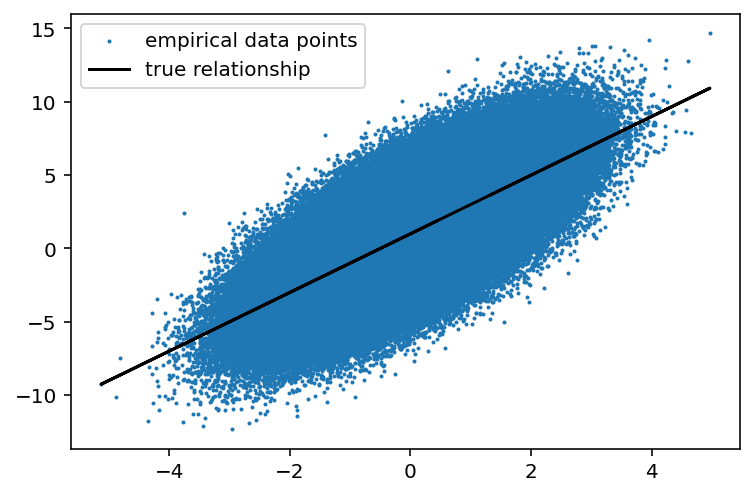

In [11]:
plt.scatter(x, y_noisy, label='empirical data points', s=1)
plt.plot(x, y, color='black', label='true relationship')
plt.legend(loc="upper left")
plt.show()

In [12]:
import sklearn
print('Scikit-Learn Version:', sklearn.__version__)

Scikit-Learn Version: 1.0.1


We'll use the [`LinearRegression` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from Scikit-Learn to instantiate a model and fit it to our data.

In [13]:
from sklearn.linear_model import LinearRegression as skLinearRegression

# instantiate model
sk_lr = skLinearRegression()

In [14]:
type(sk_lr)

sklearn.linear_model._base.LinearRegression

In [15]:
df = pd.DataFrame({'x': x, 'y': y_noisy})

In [16]:
%%time

reg_cpu = sk_lr.fit(df[['x']], df['y'])

CPU times: user 20.6 ms, sys: 8.16 ms, total: 28.8 ms
Wall time: 27.8 ms


In [17]:
print("Coefficients:")
print(reg_cpu.coef_)
print("Intercept:")
print(reg_cpu.intercept_)

Coefficients:
[2.0037532]
Intercept:
0.99903536


In [18]:
# create new data and perform inference
inputs = np.linspace(start=-5, stop=5, num=100)

new_data_df = pd.DataFrame({'x': inputs})
outputs = sk_lr.predict(new_data_df[['x']])

Let's now visualize our empirical data points, the true relationship of the data, and the relationship estimated by the model. Looks pretty close!

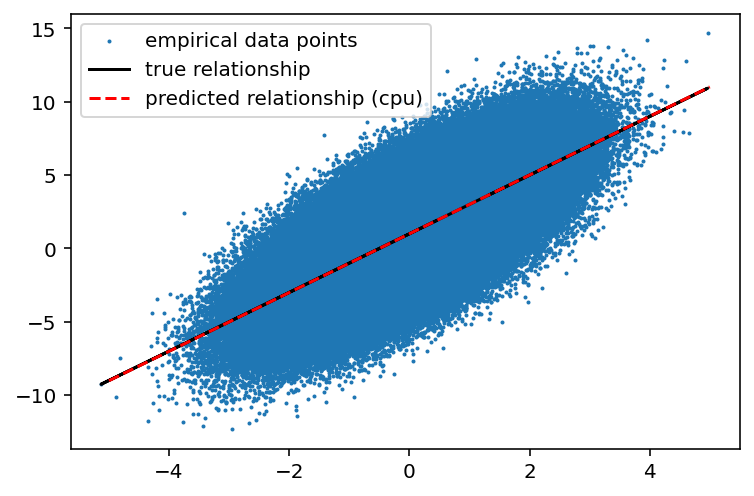

In [19]:
plt.scatter(x, y_noisy, label='empirical data points', s=1)
plt.plot(x, y, color='black', label='true relationship')
plt.plot(inputs, outputs, color='red', label='predicted relationship (cpu)', linestyle="--")
plt.legend(loc="upper left")
plt.show()

<a id="cuml"></a>
## cuML

The mathematical operations underlying many machine learning algorithms are often matrix multiplications. These types of operations are highly parallelizable and can be greatly accelerated using a GPU. [cuML](https://docs.rapids.ai/api/cuml/stable/) makes it easy to build machine learning models in an accelerated fashion while still using an interface nearly identical to Scikit-Learn. The below shows how to accomplish the same Linear Regression model but on a GPU.

First, let's convert our data from a NumPy representation to a cuDF representation.

In [20]:
# create a cuDF DataFrame
gdf = cudf.DataFrame({'x': x, 'y': y_noisy})
print(gdf.head())

          x         y
0  0.437672  2.391602
1  0.122464  3.612731
2  1.102671  4.524233
3 -0.754444 -5.801730
4 -0.201558  1.190927


In [21]:
!nvidia-smi

Mon Dec 13 03:53:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |    466MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
import cuml
print('cuML Version:', cuml.__version__)

cuML Version: 21.12.00


Next, we'll load the GPU accelerated [`LinearRegression` class](https://docs.rapids.ai/api/cuml/stable/api.html#linear-regression) from cuML, instantiate it, and fit it to our data.

In [23]:
from cuml.linear_model import LinearRegression 

# instantiate model
lr = LinearRegression()

In [24]:
type(lr)

cuml.linear_model.linear_regression.LinearRegression

In [25]:
!nvidia-smi

Mon Dec 13 03:53:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |    792MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
# instantiate algo on GPU with small dataset
reg_gpu = lr.fit(gdf[['x']][:2], gdf['y'][:2])

/home/studio-lab-user/.conda/envs/rapids-21.12/lib/python3.8/site-packages/cuml/internals/api_decorators.py:409: UserWarning: Changing solver from 'eig' to 'svd' as eig solver does not support training data with 1 column currently.
  return func(*args, **kwargs)


In [27]:
!nvidia-smi

Mon Dec 13 03:53:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |   1058MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
%%time

reg_gpu = lr.fit(gdf[['x']], gdf['y'])

CPU times: user 4.26 ms, sys: 4.07 ms, total: 8.33 ms
Wall time: 7 ms


In [29]:
print("Coefficients:")
print(reg_gpu.coef_)
print("Intercept:")
print(reg_gpu.intercept_)

Coefficients:
0    2.003753
dtype: float32
Intercept:
0.9990354180335999


We can use this model to predict values for new data points, a step often called "inference" or "scoring". All model fitting and predicting steps are GPU accelerated.

In [30]:
# create new data and perform inference
new_data_gdf = cudf.DataFrame({'x': inputs})
outputs_gpu = lr.predict(new_data_gdf[['x']])

Lastly, we can overlay our predicted relationship using our GPU accelerated Linear Regression model (green line) over our empirical data points (light blue circles), the true relationship (blue line), and the predicted relationship from a model built on the CPU (red line). We see that our GPU accelerated model's estimate of the true relationship (green line) is identical to the CPU based model's estimate of the true relationship (red line)!

In [31]:
# copy array to CPU to display
outputs_gpu_copy = outputs_gpu.to_numpy()

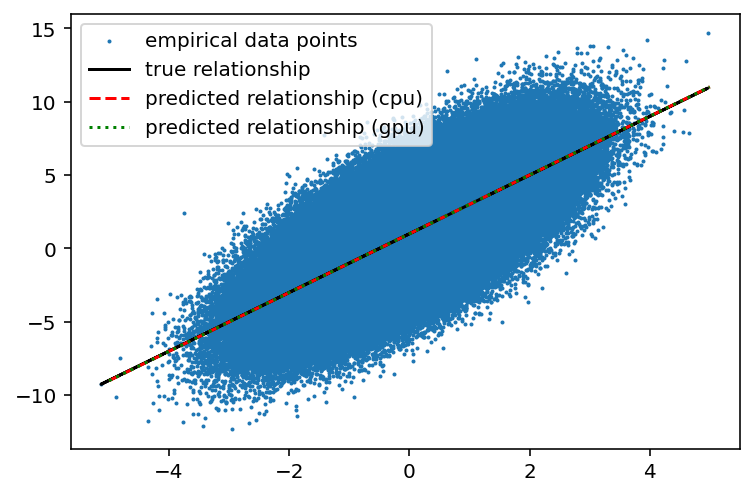

In [32]:
plt.scatter(x, y_noisy, label='empirical data points', s=1)
plt.plot(x, y, color='black', label='true relationship')
plt.plot(inputs, outputs, color='red', label='predicted relationship (cpu)', linestyle="--")
plt.plot(inputs, outputs_gpu_copy, color='green', label='predicted relationship (gpu)', linestyle=":")
plt.legend(loc="upper left")
plt.show()

In [33]:
!nvidia-smi

Mon Dec 13 03:53:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |   1058MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------